<a href="https://colab.research.google.com/github/priaJuli/Own_research/blob/main/Simply_Cancer_Wincosin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Gathering

datasources

https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data

### Prepare packages used

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelBinarizer, StandardScaler, MinMaxScaler
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import ShuffleSplit, cross_validate, train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline


import matplotlib.pyplot as plt

### Load pandas dataframe

In [2]:


from sklearn.datasets import load_breast_cancer

dfcancer = load_breast_cancer(as_frame=True)

df = dfcancer.data

targetY = dfcancer.target


# path_data = "/content/gdrive/MyDrive/dataset/data.csv"

## Loading data
# df = pd.read_csv(path_data, sep=',')

df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


## Data Preparation

Remove columns tidak terpakai

In [4]:
getcorr = df.corr(numeric_only=True).unstack()

In [5]:
drops_redudant = []

for idx in getcorr.index:
    if idx[0] == idx[1]:
        drops_redudant.append(idx)

In [6]:
drops_redudant

[('mean radius', 'mean radius'),
 ('mean texture', 'mean texture'),
 ('mean perimeter', 'mean perimeter'),
 ('mean area', 'mean area'),
 ('mean smoothness', 'mean smoothness'),
 ('mean compactness', 'mean compactness'),
 ('mean concavity', 'mean concavity'),
 ('mean concave points', 'mean concave points'),
 ('mean symmetry', 'mean symmetry'),
 ('mean fractal dimension', 'mean fractal dimension'),
 ('radius error', 'radius error'),
 ('texture error', 'texture error'),
 ('perimeter error', 'perimeter error'),
 ('area error', 'area error'),
 ('smoothness error', 'smoothness error'),
 ('compactness error', 'compactness error'),
 ('concavity error', 'concavity error'),
 ('concave points error', 'concave points error'),
 ('symmetry error', 'symmetry error'),
 ('fractal dimension error', 'fractal dimension error'),
 ('worst radius', 'worst radius'),
 ('worst texture', 'worst texture'),
 ('worst perimeter', 'worst perimeter'),
 ('worst area', 'worst area'),
 ('worst smoothness', 'worst smoothn

In [7]:
getcorr.drop(labels=drops_redudant, inplace=True)

In [8]:
def filter_to_minimum(getcorr, value=0.9):
    alams = zip(getcorr.index, getcorr)
    getfilters = []
    for ones, values in alams:
        if values >= value:
            getfilters.append(ones[0])
            getfilters.append(ones[1])
    return np.unique(getfilters)

In [9]:
len(filter_to_minimum(getcorr, value=0.80))

23

Cek jika terdapat nilai bernilai NULL

In [10]:
df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
dtype: int64

## Data Visualization


Cek jumlah kelas diagnosis

<Axes: title={'center': 'Diagnosis'}>

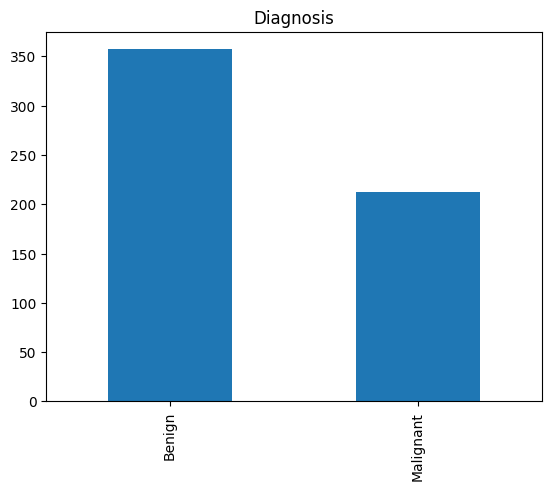

In [11]:
classes = targetY.value_counts()

new_keys = {1: 'Benign', 0: 'Malignant'}

classes.rename(new_keys, inplace=True)

classes.plot(kind='bar', title="Diagnosis")

## Feature selection with KBest And Chi-Square

Define X and Y

In [12]:
y = targetY

X = df

In [13]:
X.shape

(569, 30)

## First check the dataset within clustering to see how much distribution of all datas

To check how the distribution of dataset is applied with PCA for two feats

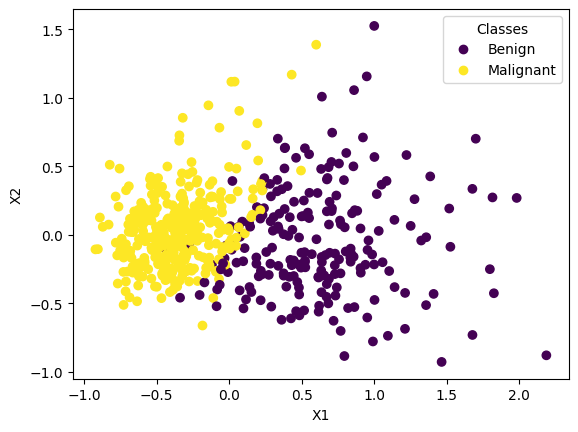

In [14]:
from sklearn.decomposition import PCA

# labeloriginal = labelenc.inverse_transform(y)

scalerminmax = MinMaxScaler()

X_scaled = scalerminmax.fit_transform(X)

X_reduced = PCA(n_components=2).fit_transform(X_scaled)

_, ax = plt.subplots()

scatter = ax.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y)
ax.set(xlabel="X1", ylabel="X2")
_ = ax.legend(
    scatter.legend_elements()[0], new_keys.values(), loc='upper right', title="Classes"
)

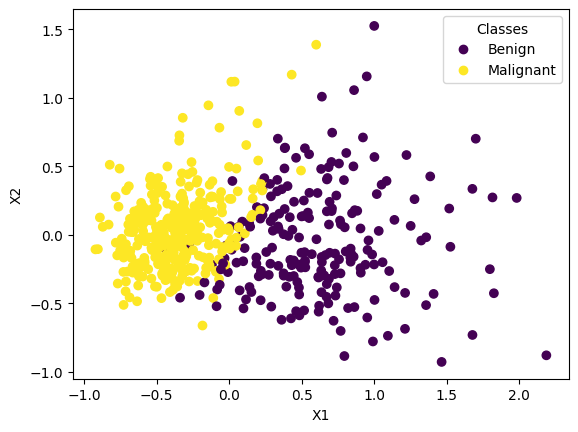

In [15]:

scalerminmax = MinMaxScaler()

X_scaled = scalerminmax.fit_transform(X)

X_reduced = PCA(n_components=2).fit_transform(X_scaled)

_, ax = plt.subplots()

scatter = ax.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y)
ax.set(xlabel="X1", ylabel="X2")
_ = ax.legend(
    scatter.legend_elements()[0], new_keys.values(), loc='upper right', title="Classes"
)

In [16]:
# from sklearn.mixture import GaussianMixture

# gm = GaussianMixture(n_components=2, random_state=0, covariance_type="full")

# X_gm = gm.fit_transform()

In [17]:
fiturselect = SelectKBest(chi2, k=25)

fiturselect.fit(X, y)

X_new = df[fiturselect.get_feature_names_out()]

X_new.shape

(569, 25)

In [18]:
fiturselect.get_feature_names_out()

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'radius error',
       'perimeter error', 'area error', 'compactness error',
       'concavity error', 'concave points error', 'worst radius',
       'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry',
       'worst fractal dimension'], dtype=object)

In [19]:
fiturselect.scores_

array([2.66104917e+02, 9.38975081e+01, 2.01110286e+03, 5.39916559e+04,
       1.49899264e-01, 5.40307549e+00, 1.97123536e+01, 1.05440354e+01,
       2.57379775e-01, 7.43065536e-05, 3.46752472e+01, 9.79353970e-03,
       2.50571896e+02, 8.75850471e+03, 3.26620664e-03, 6.13785332e-01,
       1.04471761e+00, 3.05231563e-01, 8.03633831e-05, 6.37136566e-03,
       4.91689157e+02, 1.74449400e+02, 3.66503542e+03, 1.12598432e+05,
       3.97365694e-01, 1.93149220e+01, 3.95169151e+01, 1.34854195e+01,
       1.29886140e+00, 2.31522407e-01])

In [20]:
fiturselect.pvalues_

array([8.01397628e-060, 3.32292194e-022, 0.00000000e+000, 0.00000000e+000,
       6.98631644e-001, 2.01012999e-002, 9.00175712e-006, 1.16563638e-003,
       6.11926026e-001, 9.93122221e-001, 3.89553429e-009, 9.21168192e-001,
       1.94877489e-056, 0.00000000e+000, 9.54425121e-001, 4.33366115e-001,
       3.06726812e-001, 5.80621137e-001, 9.92847410e-001, 9.36379753e-001,
       6.11324751e-109, 7.89668299e-040, 0.00000000e+000, 0.00000000e+000,
       5.28452867e-001, 1.10836762e-005, 3.25230064e-010, 2.40424384e-004,
       2.54421307e-001, 6.30397277e-001])

In [21]:
X_new.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,radius error,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,1.0950,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.5435,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.7456,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.4956,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.7572,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [22]:
y = y.ravel()

## Prepare function Cross validation and model - model used in this submission

In [23]:
scoring_metrics = ('accuracy',  'precision', 'recall')

In [24]:
class CompileModel:
    def __init__(self, scoring_metrics, cv, X, y):
        self.scoring_metrics = scoring_metrics
        self.cv = cv
        self.X = X
        self.y = y
        self.result = {}
        self.model_origin = {}

    def train_model(self, model, model_name):

        model = Pipeline([('scaler', StandardScaler()), ('clf', model)])

        self.model_origin[model_name] = model

        cv_res = cross_validate(model, self.X, self.y, cv=self.cv, scoring=self.scoring_metrics)

        series_res = {
            "mean_acc": np.mean(cv_res['test_accuracy']),
            "mean_precision": np.mean(cv_res['test_precision']),
            "mean_recall": np.mean(cv_res['test_recall'])
        }

        self.result[model_name] = pd.Series(series_res)

    def select_the_best_model(self):

        the_best_model = None
        curr_metrics = None

        for resone in self.result:
            print(resone)
            if the_best_model is None:
                the_best_model = resone
                curr_metrics = self.result[resone].copy()
            else:
                if sum((self.result[resone] < curr_metrics).astype(int)) > 2:
                    print(resone, " Has worse result")
                else:
                    the_best_model = resone
                    curr_metrics = self.result[resone]

        return self.model_origin[the_best_model], self.result[the_best_model]



In [25]:
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=1)


In [26]:
CompileModel = CompileModel(scoring_metrics, cv, X_new, y)

In [27]:
lr_model = LogisticRegression(solver='liblinear', max_iter=75, random_state=42)

CompileModel.train_model(lr_model, "LogisticRegresion")

In [28]:
mlp_model = MLPClassifier(random_state=42)

CompileModel.train_model(mlp_model, "MLP")

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

In [29]:
svc_model = LinearSVC(dual=False, random_state=42, tol=1e-5)

CompileModel.train_model(svc_model, "LinearSVC")

In [30]:
CompileModel.result

{'LogisticRegresion': mean_acc          0.982456
 mean_precision    0.980087
 mean_recall       0.991549
 dtype: float64,
 'MLP': mean_acc          0.982456
 mean_precision    0.977348
 mean_recall       0.994366
 dtype: float64,
 'LinearSVC': mean_acc          0.980702
 mean_precision    0.974328
 mean_recall       0.994366
 dtype: float64}

In [31]:
best_model, model_metrics = CompileModel.select_the_best_model()

LogisticRegresion
MLP
LinearSVC


In [32]:
best_model

Pipeline(steps=[('scaler', StandardScaler()),
                ('clf', LinearSVC(dual=False, random_state=42, tol=1e-05))])

In [33]:
model_metrics

mean_acc          0.980702
mean_precision    0.974328
mean_recall       0.994366
dtype: float64

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.3, random_state=1)

In [35]:
best_model.fit(X_train, y_train)

y_pred = best_model.predict(X_test)

In [36]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
import matplotlib.pyplot as plt

conv_matrix = confusion_matrix(y_true=(y_test), y_pred=(y_pred), labels=[0, 1])

print(conv_matrix)

[[ 61   2]
 [  4 104]]


In [37]:
print(accuracy_score((y_test), (y_pred)))

0.9649122807017544


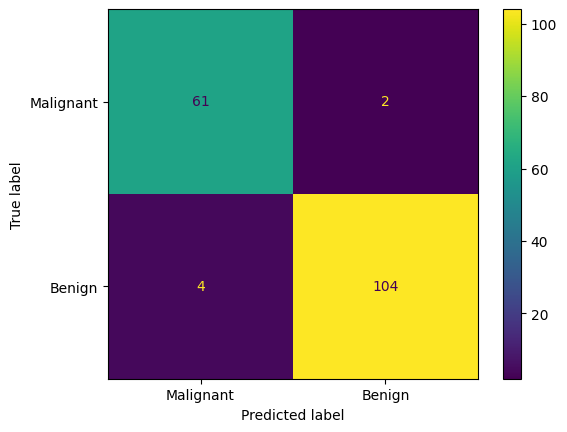

In [38]:
disp = ConfusionMatrixDisplay(confusion_matrix=conv_matrix, display_labels=["Malignant", "Benign"])
disp.plot()

plt.show()